## Task 3 Principal Component Analysis

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv('C:/Users/jcaye/Downloads/D600 Task 3 Dataset 1 Housing Information.csv')
df

,ID,Price,SquareFootage,NumBathrooms,NumBedrooms,BackyardSpace,CrimeRate,SchoolRating,AgeOfHome,DistanceToCityCenter,...,RenovationQuality,LocalAmenities,TransportAccess,Fireplace,HouseColor,Garage,Floors,Windows,PreviousSalePrice,IsLuxury
0,4922,255614.8992,566.62,1.000000,4,779.42,20.56,5.62,39.46,10.08,...,4.93,4.44,4.55,Yes,Blue,No,1,13,181861.54230,0
1,5009,155586.0947,1472.34,1.000000,2,656.13,15.62,5.63,40.51,7.89,...,4.08,5.56,6.83,No,Green,No,1,17,50042.59757,0
2,4450,131050.8324,550.00,1.779354,3,754.57,12.47,9.20,48.38,23.74,...,4.26,8.07,8.48,Yes,Green,Yes,2,34,48400.34440,0
3,1070,151361.7125,941.81,2.035254,2,439.59,22.22,7.08,94.67,5.22,...,4.45,5.00,6.27,Yes,Red,No,1,14,84594.12145,0
4,400,113167.6128,550.00,1.064644,3,353.03,8.28,5.93,16.80,43.13,...,3.36,5.46,6.99,No,White,Yes,1,21,22934.59654,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,6987,307821.1758,550.00,2.111022,4,892.35,11.89,7.97,28.18,19.23,...,4.76,3.81,6.87,No,White,Yes,1,18,241131.63070,1
6996,6995,421368.8869,1726.12,4.056115,2,943.19,34.06,5.82,90.45,17.60,...,5.31,9.84,10.00,No,White,Yes,1,18,481604.80730,1
6997,6996,473382.5348,1026.36,2.077177,5,149.31,0.10,8.81,31.79,11.59,...,4.98,7.47,2.96,No,Green,No,1,13,380555.49390,1
6998,6998,343397.9756,2218.22,1.000000,4,526.81,11.18,9.20,15.21,3.96,...,4.68,7.66,6.12,No,Blue,Yes,1,10,442610.31710,0


In [30]:
df.columns

Index(['ID', 'Price', 'SquareFootage', 'NumBathrooms', 'NumBedrooms',
       'BackyardSpace', 'CrimeRate', 'SchoolRating', 'AgeOfHome',
       'DistanceToCityCenter', 'EmploymentRate', 'PropertyTaxRate',
       'RenovationQuality', 'LocalAmenities', 'TransportAccess', 'Fireplace',
       'HouseColor', 'Garage', 'Floors', 'Windows', 'PreviousSalePrice',
       'IsLuxury'],
      dtype='object')

### B1. Propose one research question that is relevant to a real-world organizational situation that you will answer using linear regression

<p>The research question that is relevant to the housing information dataset and can be answered using linear regression is: Which property characteristics most significantly determine housing prices?</p>

### B2. Define one goal of the data analysis

<p>One goal of the data analysis is to identify the key property attributes that significantly influence housing prices, using linear regression. This goal can help stakeholders such as real estate companies and developers prioritize which features to include in new construction projects that have the highest potential return, and develop accurate house pricing strategies. This data analysis goal is within the scope of the scenario and data.</p>

### C1. Explain how PCA can be used to prepare the dataset for regression analysis. Include expected outcomes

<p>To perform PCA on the housing dataset, the first step is to standardize the data using the StandardScaler() function from the sklearn library to ensure all continuous variables are on the same scale. The second step is to transform the standardized data into principal components, which are linear combinations of the original variables in the dataset. Principal components are ordered by the amount of variance they explain. For example, the first principal component (PC1) captures the most variance, followed by the second (PC2), and so on. The third step is choosing the number of principal components. The key is choosing enough PCAs that capture most variance. The last step is use the chosen PCAs as input variables for the regression model instead of the original variables.</p>

<p>By performing PCA on the regression model, there are a few expected outcomes. First, it simplifies the regression model by reducing the number of variables while maintaining most information in the data. Second, it reduces multicollinearity between variables since PCA creates uncorrelated components from correlated features. Third, it improves the regression model's performance by focusing only on components that capture the most variance.</p>

### C2. Summarize one assumption of PCA

<p>One assumption of PCA is that it assumes a linear relationship between variables. PCA performs well when variables show straight-line relationships, as it can then effectively reduce the number of variables and remove multicollinearity while keeping the most important patterns in the data. If the relationships between variables are non-linear, PCA may not capture the important patterns in the data. Data transformations must be performed to turn non-linear variables into linear, making it suitable for PCA. </p>

### D1. Identify the continuous dataset variables that are needed to answer the research question

<p>I have identified the continuous variables that I will use to answer the research question from part B1. Price will be the dependent variable because our research question focuses on determining which property features most significantly impact housing prices. Price represents the housing prices we want to predict and understand, making it the logical choice as the dependent variable. The other continuous variables that I have chosen are: SquareFootage, NumBathrooms, NumBedrooms, BackyardSpace, CrimeRate, SchoolRating, AgeOfHome, DistanceToCityCenter, EmploymentRate, PropertyTaxRate, RenovationQuality, LocalAmenities, TransportAccess, and PreviousSalePrice. These variables will be the independent variables for our regression model. For SquareFootage, larger properties typically have higher prices. For NumBathrooms, properties with multiple bathrooms are typically more expensive. For NumBedrooms, properties with multiple bedrooms generally command higher prices. For BackyardSpace, houses with larger backyards tend to have higher prices. For CrimeRate, properties in areas with lower crime rates are typically associated with higher property prices. For SchoolRating, properties in areas with good school systems are generally more expensive. For AgeOfHome, newer homes typically have higher prices than older homes because they were built more recently. For DistanceToCityCenter, houses that are located closer to urban centers are more desirable. For EmploymentRate, properties in areas with higher employment rates tend to be more expensive. For PropertyTaxRate, higher property taxes might impact home buyers' decisions, potentially influencing the price. For RenovationQuality, homes that are renovated well generally command higher prices. For LocalAmenities, properties that have many nearby amenities are typically linked to higher property values. For TransportAccess, convenient transport connections can increase a property's appeal. For PreviousSalePrice, it tells historical value trends, helping model price growth or depreciation. I selected these variables as independent variables because they represent physical attributes of a property, the surrounding neighborhood, and accessibility. These factors are likely to influence property prices and are well-suited for analysis using linear regression. 
</p>

### D2. Standardize the continuous variables. Include a copy of the cleaned dataset

In [31]:
from sklearn.preprocessing import StandardScaler

target_variable = "Price" #storing the dependent variable Price into target_variable

#storing the independent variables into independent_variables
independent_variables = [
    "SquareFootage", "NumBathrooms", "NumBedrooms", "BackyardSpace",
    "CrimeRate", "SchoolRating", "AgeOfHome", "DistanceToCityCenter",
    "EmploymentRate", "PropertyTaxRate", "RenovationQuality",
    "LocalAmenities", "TransportAccess", "PreviousSalePrice"
]

features = df[independent_variables] #creating a feature subset containing only the independent variables

scaler = StandardScaler() #creating a StandardScaler object
standardized_features = scaler.fit_transform(features) #fitting the scaler to the features and transforming them

#creating a new dataframe that contains the standardized features with column names
standardized_df = pd.DataFrame(standardized_features, columns=independent_variables) 

#creating the final standardized dataframe including both dependent and independent variables
standardized_df_with_dependent = pd.concat([df[target_variable], standardized_df], axis=1) 

standardized_df_with_dependent

,Price,SquareFootage,NumBathrooms,NumBedrooms,BackyardSpace,CrimeRate,SchoolRating,AgeOfHome,DistanceToCityCenter,EmploymentRate,PropertyTaxRate,RenovationQuality,LocalAmenities,TransportAccess,PreviousSalePrice
0,255614.8992,-1.132277,-1.187828,0.970213,0.957151,-0.591776,-0.700696,-0.230889,-0.615042,0.794367,0.681094,-0.037232,-0.562349,-0.733870,-0.552700
1,155586.0947,0.993926,-1.187828,-0.986989,0.516683,-0.865854,-0.695399,-0.197846,-0.797175,-0.109066,-1.104064,-0.468641,-0.140939,0.433066,-1.262469
2,131050.8324,-1.171293,-0.369602,-0.008388,0.868372,-1.040621,1.195478,0.049814,0.521008,0.641205,0.741268,-0.377284,0.803473,1.277560,-1.271312
3,151361.7125,-0.251508,-0.100938,-0.986989,-0.256932,-0.499677,0.072604,1.506508,-1.019229,-0.501960,-0.101167,-0.280851,-0.351644,0.146450,-1.076429
4,113167.6128,-1.171293,-1.119960,-0.008388,-0.566178,-1.273088,-0.536502,-0.943973,2.133599,-1.600730,-0.482268,-0.834070,-0.178565,0.514957,-1.408430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,307821.1758,-1.171293,-0.021391,0.970213,1.360608,-1.072800,0.543999,-0.585857,0.145929,0.710017,-0.221514,-0.123514,-0.799393,0.453539,-0.233564
6996,421368.8869,1.589681,2.020716,-0.986989,1.542240,0.157224,-0.594764,1.373709,0.010368,-0.324381,0.340108,0.155634,1.469452,2.055517,1.061246
6997,473382.5348,-0.053025,-0.056924,1.948814,-1.293993,-1.726927,0.988911,-0.472255,-0.489461,0.190598,-0.101167,-0.011855,0.577717,-1.547654,0.517154
6998,343397.9756,2.744900,-1.187828,0.970213,0.054672,-1.112192,1.195478,-0.994009,-1.124018,1.373718,0.039239,-0.164117,0.649206,0.069678,0.851283


<p>In the code, I stored the dependent variable Price into target_variable, and stored the 14 independent variables into independent_variables. I created a feature subset containing only the indepedendent variables and stored them into the features variable. Then, I initialized an instance of StandardScaler from sklearn library, and fit the scaler to the features and transformed the data so each feature has a mean of 0 and a standard deviation of 1. The standardized_df variable is a dataframe that contains the standardized features. The standardized_df_with_dependent variable is a dataframe that contains the standardized features and the dependent variable Price. </p>

<p>Looking at the standardized data, all the independent variables have been properly transformed. Their mean is effectively 0, and their standard deviation is approximately 1. All variables in the data are now on the same scale, making them suitable for PCA.  </p>

#### Saving the standardized dataframe as a CSV file

In [5]:
#saving the final standardized dataframe as a csv file
standardized_df_with_dependent.to_csv("standardized_data.csv", index=False)

### D3. Describe the dependent variable and all independent variables using descriptive statistics, including a screenshot for each variable

#### Dependent Variable: Price

In [6]:
df['Price'].describe()

count    7.000000e+03
mean     3.072820e+05
std      1.501734e+05
min      8.500000e+04
25%      1.921075e+05
50%      2.793230e+05
75%      3.918781e+05
max      1.046676e+06
Name: Price, dtype: float64

In [7]:
df['Price'].mode()

0       8.500000e+04
1       8.623883e+04
2       8.625022e+04
3       8.755343e+04
4       8.759270e+04
            ...     
6995    1.004324e+06
6996    1.021383e+06
6997    1.024519e+06
6998    1.045707e+06
6999    1.046676e+06
Name: Price, Length: 7000, dtype: float64

<p>The Price variable has a total count of 7000, mean value of 307282, minimum value of 85000, maximum value of 1046676, and a range value of 961676 (max-min). Price also has many mode values, as indicated by the results from using the mode() function.</p>

#### Independent Variable: SquareFootage

In [8]:
df['SquareFootage'].describe()

count    7000.000000
mean     1048.947459
std       426.010482
min       550.000000
25%       660.815000
50%       996.320000
75%      1342.292500
max      2874.700000
Name: SquareFootage, dtype: float64

In [9]:
df['SquareFootage'].mode()

0    550.0
Name: SquareFootage, dtype: float64

<p>The SquareFootage variable has a total count of 7000, mean value of 1048.94, mode value of 550, minimum value of 550, maximum value of 2844.70, and a range value of 2324 (max-min).</p>

#### Independent Variable: NumBathrooms

In [10]:
df['NumBathrooms'].describe()

count    7000.000000
mean        2.131397
std         0.952561
min         1.000000
25%         1.290539
50%         1.997774
75%         2.763997
max         5.807239
Name: NumBathrooms, dtype: float64

In [11]:
df['NumBathrooms'].mode()

0    1.0
Name: NumBathrooms, dtype: float64

<p>The NumBathrooms variable has a total count of 7000, mean value of 2.1, mode value of 1.0, minimum value of 1, maximum value of 5.8, and a range value of 4.8 (max-min). </p>

#### Independent Variable: NumBedrooms

In [12]:
df['NumBedrooms'].describe()

count    7000.000000
mean        3.008571
std         1.021940
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         7.000000
Name: NumBedrooms, dtype: float64

In [13]:
df['NumBedrooms'].mode()

0    3
Name: NumBedrooms, dtype: int64

<p>The NumBedrooms variable has a total count of 7000, mean value of 3.0, mode value of 3, minimum value of 1.0, maximum value of 7, and a range value of 6 (max-min). </p>

#### Independent Variable: BackyardSpace

In [14]:
df['BackyardSpace'].describe()

count    7000.000000
mean      511.507029
std       279.926549
min         0.390000
25%       300.995000
50%       495.965000
75%       704.012500
max      1631.360000
Name: BackyardSpace, dtype: float64

In [15]:
df['BackyardSpace'].mode()

0    300.08
1    418.29
2    516.29
Name: BackyardSpace, dtype: float64

<p>The BackyardSpace variable has a total count of 7000, mean value of 511.5, mode values of 300.08, 418.29, and 516.29, minimum value of 0.39, maximum value of 1631, and a range value of 1630.97 (max-min).</p>

#### Independent Variable: CrimeRate

In [16]:
df['CrimeRate'].describe()

count    7000.000000
mean       31.226194
std        18.025327
min         0.030000
25%        17.390000
50%        30.385000
75%        43.670000
max        99.730000
Name: CrimeRate, dtype: float64

In [17]:
df['CrimeRate'].mode()

0    34.01
Name: CrimeRate, dtype: float64

<p>The CrimeRate variable has a total count of 7000, mean value of 31.2, mode value of 34.01, minimum value of 0.03, maximum value of 99.73, and a range value of 99.70 (max-min).</p>

#### Independent Variable: SchoolRating

In [18]:
df['SchoolRating'].describe()

count    7000.000000
mean        6.942923
std         1.888148
min         0.220000
25%         5.650000
50%         7.010000
75%         8.360000
max        10.000000
Name: SchoolRating, dtype: float64

In [19]:
df['SchoolRating'].mode()

0    10.0
Name: SchoolRating, dtype: float64

<p>The SchoolRating variable has a total count of 7000, mean value of 6.94, mode value of 10.0, minimum value of 0.22, maximum value of 10, and a range value of 9.78 (max-min).</p>

#### Independent Variable: AgeOfHome

In [20]:
df['AgeOfHome'].describe()

count    7000.000000
mean       46.797046
std        31.779701
min         0.010000
25%        20.755000
50%        42.620000
75%        67.232500
max       178.680000
Name: AgeOfHome, dtype: float64

In [21]:
df['AgeOfHome'].mode()

0    18.18
1    19.15
Name: AgeOfHome, dtype: float64

<p>The AgeOfHome variable has a total count of 7000, mean value of 46.79, mode values of 18.18 and 19.15, minimum value of 0.01, maximum value of 178.68, and a range value of 178.67 (max-min).</p>

#### Independent Variable: DistanceToCityCenter

In [22]:
df['DistanceToCityCenter'].describe()

count    7000.000000
mean       17.475337
std        12.024985
min         0.000000
25%         7.827500
50%        15.625000
75%        25.222500
max        65.200000
Name: DistanceToCityCenter, dtype: float64

In [23]:
df['DistanceToCityCenter'].mode()

0    8.29
Name: DistanceToCityCenter, dtype: float64

<p>The DistanceToCityCenter variable has a total count of 7000, mean value of 17.47, mode value of 8.29, minimum value of 0, maximum value of 65.20, and a range value of 65.20 (max-min).</p>

#### Independent Variable: EmploymentRate

In [24]:
df['EmploymentRate'].describe()

count    7000.000000
mean       93.711349
std         4.505359
min        72.050000
25%        90.620000
50%        94.010000
75%        97.410000
max        99.900000
Name: EmploymentRate, dtype: float64

In [25]:
df['EmploymentRate'].mode()

0    99.9
Name: EmploymentRate, dtype: float64

<p>The EmploymentRate variable has a total count of 7000, mean value of 93.71, mode value of 99.9, minimum value of 72.05, maximum value of 99.90, and a range value of 27.85 (max-min).</p>

#### Independent Variable: PropertyTaxRate

In [26]:
df['PropertyTaxRate'].describe()

count    7000.000000
mean        1.500437
std         0.498591
min         0.010000
25%         1.160000
50%         1.490000
75%         1.840000
max         3.360000
Name: PropertyTaxRate, dtype: float64

In [27]:
df['PropertyTaxRate'].mode()

0    1.43
Name: PropertyTaxRate, dtype: float64

<p>The PropertyTaxRate variable has a total count of 7000, mean value of 1.50, mode value of 1.43, minimum value of 0.01, maximum value of 3.36, and a range value of 3.35 (max-min).</p>

#### Independent Variable: RenovationQuality

In [28]:
df['RenovationQuality'].describe()

count    7000.000000
mean        5.003357
std         1.970428
min         0.010000
25%         3.660000
50%         5.020000
75%         6.350000
max        10.000000
Name: RenovationQuality, dtype: float64

In [29]:
df['RenovationQuality'].mode()

0    10.0
Name: RenovationQuality, dtype: float64

<p>The RenovationQuality variable has a total count of 7000, mean value of 5.00, mode value of 10.0, minimum value of 0.01, maximum value of 10.0, and a range value of 9.99 (max-min).</p>

#### Independent Variable: LocalAmenities

In [30]:
df['LocalAmenities'].describe()

count    7000.000000
mean        5.934579
std         2.657930
min         0.000000
25%         4.000000
50%         6.040000
75%         8.050000
max        10.000000
Name: LocalAmenities, dtype: float64

In [31]:
df['LocalAmenities'].mode()

0    10.0
Name: LocalAmenities, dtype: float64

<p>The LocalAmenities variable has a total count of 7000, mean value of 5.93, mode value of 10.0, minimum value of 0, maximum value of 10, and a range value of 10 (max-min).</p>

#### Independent Variable: TransportAccess

In [32]:
df['TransportAccess'].describe()

count    7000.000000
mean        5.983860
std         1.953974
min         0.010000
25%         4.680000
50%         6.000000
75%         7.350000
max        10.000000
Name: TransportAccess, dtype: float64

In [33]:
df['TransportAccess'].mode()

0    10.0
Name: TransportAccess, dtype: float64

<p>The TransportAccess variable has a total count of 7000, mean value of 5.98, mode value of 10.0, minimum value of 0.01, maximum value of 10, and a range value of 9.99 (max-min).</p>

#### Independent Variable: PreviousSalePrice

In [34]:
df['PreviousSalePrice'].describe()

count    7.000000e+03
mean     2.845094e+05
std      1.857340e+05
min     -8.356902e+03
25%      1.420140e+05
50%      2.621831e+05
75%      3.961212e+05
max      1.296607e+06
Name: PreviousSalePrice, dtype: float64

In [35]:
df['PreviousSalePrice'].mode()

0      -8.356902e+03
1      -8.239721e+03
2      -7.039291e+03
3      -6.084476e+03
4      -6.004653e+03
            ...     
6995    1.099355e+06
6996    1.142999e+06
6997    1.226586e+06
6998    1.251495e+06
6999    1.296607e+06
Name: PreviousSalePrice, Length: 7000, dtype: float64

<p>The PreviousSalePrice variable has a total count of 7000, mean value of 284509.40, minimum value of -8356.90, maximum value of 1296607, and a range value of 1304963.90 (max-min). PreviousSalePrice has also many mode values, as indicated by the results from using the mode() function.</p>

### E1. Determine the matrix of all principal components (REVISION FIXED)

In [32]:
from sklearn.decomposition import PCA
import numpy as np

#creating a PCA object
pca = PCA()

#fitting the PCA object on the standardized data, and transforming the data to principal components
pca_transformed = pca.fit_transform(standardized_features)

#computing the loading matrix
loadings = pd.DataFrame(
    pca.components_.T, #components_ contains the loading of the independent variables for each principal component
    columns=[f"PC{i+1}" for i in range(pca.n_components_)],
    index=independent_variables
)

loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
SquareFootage,0.324961,-0.157607,0.246368,-0.071753,0.195092,-0.126046,-0.230994,0.163614,-0.558966,0.337897,-0.152119,0.028075,-0.192828,-0.426510
NumBathrooms,0.281964,-0.175180,0.234908,-0.100779,0.207132,-0.063891,-0.137146,0.188811,0.741934,-0.186541,-0.110895,-0.008527,-0.148977,-0.321243
NumBedrooms,0.290224,-0.109988,-0.008796,0.322330,-0.374387,0.318358,0.336619,-0.425090,-0.010076,-0.089710,-0.308865,-0.006914,0.080099,-0.392628
BackyardSpace,0.094886,0.028672,-0.095680,-0.284129,0.710403,0.480563,0.277428,-0.275785,-0.065112,-0.033898,0.063315,-0.004299,-0.034522,0.032334
CrimeRate,-0.112615,-0.033720,0.595225,0.032437,0.001719,-0.155315,0.641760,0.225003,-0.155874,-0.274619,0.180765,0.005325,-0.106586,0.021238
SchoolRating,0.382476,-0.092071,-0.230761,0.206832,-0.120180,-0.004307,0.029698,-0.078287,0.013662,0.015227,0.608996,0.019597,-0.587988,0.101605
AgeOfHome,-0.143319,-0.078944,0.154037,0.507138,0.352094,-0.218133,-0.363588,-0.374795,-0.145658,-0.475966,0.013205,0.001988,-0.001605,0.012256
DistanceToCityCenter,-0.200229,0.023641,0.063212,0.443105,0.266140,-0.222287,0.247956,-0.149948,0.277410,0.690908,-0.014095,-0.001960,-0.014922,-0.008263
EmploymentRate,0.129430,0.017491,-0.582757,0.250128,0.233858,-0.254826,0.304771,0.432438,-0.093491,-0.228568,-0.342088,0.005427,-0.054761,-0.014878
PropertyTaxRate,-0.143436,0.039176,0.144715,0.456297,0.023401,0.675479,-0.189140,0.494286,-0.008576,0.037041,-0.008766,0.001424,-0.077826,0.065187


<p>In the code, I created a PCA object, and used that object to fit on the standardized data and transform the data into principal components. Then, I created a dataframe that contains the loadings of the 14 independent variables for each principal component. </p>

<p>In the loadings matrix, each column represents one principal component. There are 14 principal components in the matrix, which equals the number of the original independent variables. Each cell in the matrix indicates how much each independent variable influences each principal component. In PC1, independent variables such as SquareFootage, SchoolRating, RenovationQuality, and PreviousSalePrice have the highest positive contributions, indicating they heavily influence PC1. Since PC1 captures the most variance in the dataset, organizations should take note of the aforementioned variables for investment or improvement regarding properties.</p>

### E2. Identify the total number of principal components that should be retained using the elbow rule. Include a screenshot of the scree plot

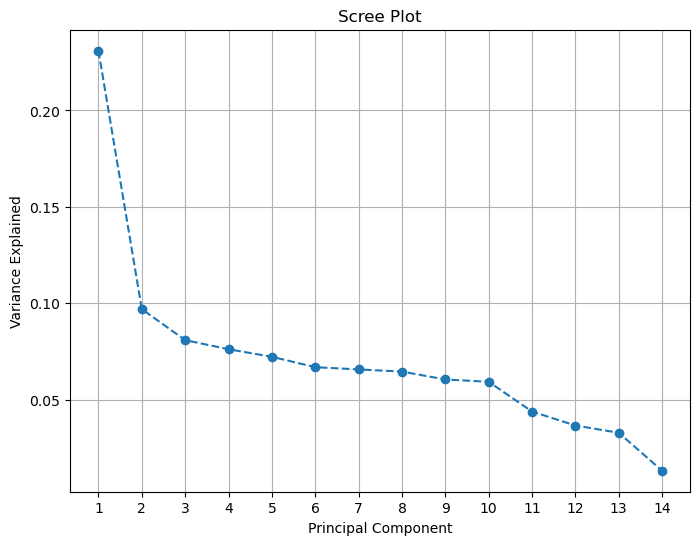

In [33]:
#extracting the explained variance ratio from the PCA object to identify how much variance each component explains
explained_variance_ratio = pca.explained_variance_ratio_

#creating a Scree Plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid()
plt.show()

<p>In this code, I extracted the explained variance ratio from the PCA object to determine how much variance each principal component explains. Then, I created a scree plot to visualize the explained variance for each principal component so we can use the elbow rule. The elbow rule is a method used to identify the number of principal components to keep without being overly complex.</p>

<p>In the scree plot, the most noticeable elbow occurs at Principle Component 2 (PC2), however since we aim to retain at least 80% of the total variance for our regression model, we will not be using PC2. A less distinct elbow appears at PC10, where there is a slight change in the slope, and the explained variance begins to flatten further. Selecting PC10 would be ideal for our regression model because PC10 retains approximately 87% of the total variance and provides a balance between reducing dimensionality and retaining most of the critical information in the housing dataset, ensuring that significant patterns are captured while minimizing complexity. Therefore, the first 10 principal components will be retained. </p>

### E3. Identify the variance of each of the principal components identified in part E2

In [34]:
#printing the variance for the first 10 PCAs
for i in range(10):  # since we selected the first 10 components, the loop iterates 10 times
    print(f"PC{i+1}: Variance Explained = {explained_variance_ratio[i]:.4f}")

PC1: Variance Explained = 0.2310
PC2: Variance Explained = 0.0969
PC3: Variance Explained = 0.0809
PC4: Variance Explained = 0.0761
PC5: Variance Explained = 0.0722
PC6: Variance Explained = 0.0668
PC7: Variance Explained = 0.0656
PC8: Variance Explained = 0.0645
PC9: Variance Explained = 0.0604
PC10: Variance Explained = 0.0592


<p>In this code, I created a loop that iterates over the first 10 principal components, outputting each component's individual variance explained. I formatted the output values to 4 decimal places. </p>

<p>PC1 explains the highest variance at 23.10%. PC2 explains 9.69% of variance. PC3 explains 8.09% of variance, PC4 explains 7.61% of variance. PC5 explains 7.22% of variance. PC6 explains 6.68% of variance. PC7 explains 6.56% of variance. PC8 explains 6.45% of variance. PC9 explains 6.04% of variance. PC10 explains 5.92% of variance. Overall, the first 10 principal components explain 87.37% of total variance, exceeding our minimum threshold of 80% for regression modeling.</p>

### E4. Summarize the results of your PCA (REVISION FIXED)

<p>In part E1, we created a loading matrix of the 14 independent variables for each principal component. In PC1, independent variables such as SquareFootage, SchoolRating, RenovationQuality, and PreviousSalePrice have the highest positive contributions, indicating they heavily influence PC1. Since PC1 captures the most variance in the dataset, organizations should take note of the aforementioned variables for investment or improvement regarding properties. In part E2, we created a scree plot. By using the elbow rule in the scree plot, we identified the total number of principal components to retain, which is 10. We selected the first 10 principal components, with PC1 accounting for nearly a quarter of the total variance, while the remaining components contribute progressively less. Together, these 10 components explain 87% of total variance, which is ideal for regression modeling because it means that the most important patterns in the housing dataset are captured, enabling the regression model to effectively make predictions with the dataset. The selected components also reduced the dimensions of the housing dataset from 14 variables to 10 principal components while preserving most of the information. This simplifies the dataset because only the important information are retained while the irrelevant features are removed, making it less likely for the regression model to overfit to noise in the dataset. Additionally, the reduced dataset makes it easier to understand the key patterns that significantly impact housing prices, without being overwhelmed by all 14 original variables. We will be using the reduced housing dataset that includes the 10 principal components throughout the regression analysis. </p>

### F1. Split the data into two datasets, with a larger percentage assigned to the training dataset and a smaller percentage assigned to the test dataset. Provide the files

In [35]:
from sklearn.model_selection import train_test_split

#creating a PCA object that retains 10 principal components
pca = PCA(n_components=10)

#fitting the PCA object on the standardized data, and transforming the 14 independent variables into principal components
X = pca.fit_transform(standardized_features)

y = df['Price'] #assigning dependent variable Price to y

#splitting the data into training and test sets. Training set gets 80% of data, while test set gets 20% of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21) 

#providing the training and test files

#converting numpy arrays to dataframes for concatenation
X_train_df = pd.DataFrame(X_train, columns=[f"PC{i+1}" for i in range(X_train.shape[1])])
X_test_df = pd.DataFrame(X_test, columns=[f"PC{i+1}" for i in range(X_test.shape[1])])

# Resetting the indices of y_train and y_test to align with X_train_df and X_test_df
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

#generating dataframes for training and test sets
train_data = pd.concat([X_train_df, y_train], axis=1)
test_data = pd.concat([X_test_df, y_test], axis=1)

#saving the dataframes as CSV files
train_data.to_csv("train_data.csv", index=False)
test_data.to_csv("test_data.csv", index=False)

<p>In this code, I used the PCA() function to create a PCA object that is configured to retain 10 principal components. Then, I fit the PCA model to the standardized features and transformed the 14 independent variables into principal components. The 10 principal components are stored in the X variable, while the dependent variable Price is stored in the y variable. I used the train_test_split() function from sklearn library to split the housing dataset into training and test sets. The training set receives 80% of the data, while the test set receives 20% of the data. Next, I converted the two numpy arrays X_train and X_test into pandas dataframes with each column labeled as PC1 through PC10 for better interpretability. I reset the indices of y_train and y_test using the reset_index() function to ensure alignment with X_train_df and X_test_df. Then, I merged X_train_df with y_train to create a single dataframe for the training set, and merged X_test_df with y_test to create a single dataframe for the test set. I saved both training and test dataframes as CSV files for submission.</p>

### F2. Use the training dataset to create and perform a regression model. Optimize the regression model and provide a screenshot of the summary of the optimized model or the model parameters

### Optimizing the OLS regression model using backward stepwise elimination method

In [36]:
import statsmodels.api as sm

#adding a constant term to both training and test sets
X_train_with_const = sm.add_constant(X_train_df)
X_test_with_const = sm.add_constant(X_test_df)

#initializing and fitting the the OLS regression model to the training data
model = sm.OLS(y_train, X_train_with_const).fit()

#loop that performs the backward stepwise elimination method
while True:
    max_p_value = max(model.pvalues) #identifying the independent variable with the highest p-value
    if max_p_value > 0.05:  #threshold for statistical significance
        excluded_variable = model.pvalues.idxmax() #retrieving the variable name with the highest p-value
        
        if excluded_variable == "const":
            break  #stop if the intercept is the variable with the highest p-value
        
        #dropping the variable from the training set
        X_train_with_const = X_train_with_const.drop(columns=[excluded_variable])
        
        #refitting the model with the remaining variables
        model = sm.OLS(y_train, X_train_with_const).fit()
        print(f"Removed variable: {excluded_variable} with p-value {max_p_value}") #printing the removed variable with its p-value
    else:
        break #break out the loop if all p-values are below 0.05 sig_level

print(model.summary())

Removed variable: PC9 with p-value 0.9986417468478026
Removed variable: PC5 with p-value 0.34170917778335463
Removed variable: PC6 with p-value 0.10397064476892587
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     1407.
Date:                Fri, 29 Nov 2024   Prob (F-statistic):               0.00
Time:                        07:50:25   Log-Likelihood:                -71870.
No. Observations:                5600   AIC:                         1.438e+05
Df Residuals:                    5592   BIC:                         1.438e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t   

<p>In this code, I optimized the Ordinary Least Squares (OLS) regression model by performing the backward stepwise elimination method. The backward stepwise elimination method simplifies the model and improves its performance by including all the independent variables in the model and iteratively removing the least significant variables with p-values above 0.05, until all remaining variables are statistically significant. Before optimizing the model, I used the add_constant() function from statsmodels library to add a constant term to both training and test sets. Then, I initialized and fit the OLS regression model to the training data. I created a while loop that performs the backward stepwise elimination method. Inside the loop, the function pvalues retrieves the independent variable with the highest p-value. If the variable's p-value is greater than the significance level (0.05), the variable gets removed from the training dataset. After the removal process, the model gets refitted using the updated training dataset. The loop continues until all the remaining variables have p-values below 0.05, indicating that all variables are statistically significant. After the loop completes, the optimized regression model's summary is displayed using the summary() function.</p>

<p>We'll go over several key metrics from this OLS regression results. The R-squared value of the regression model is 0.638, indicating that 63.8% of the variance in housing prices is explained by the 7 remaining principal components. This R-squared value suggests that there is a fairly strong relationship between the principal components and the dependent variable Price. The adjusted R-squared value of the model is 0.637 and it is slightly lower than the R-squared value, which means the model is not overfitting and does not include unnecessary principal components because the adjusted R-squared value did not get penalized as much. This confirms the effectiveness of applying the backward stepwise elimination method to the regression model, as all of the principal components that were retained in the model are efficient and relevant for predicting house prices.</p>

<p>The F-statistic value of the regression model is 1407, indicating that the overall model is statistically significant and provides a much better fit to the data compared to a model without any predictors. The Prob (F-statistic) value is 0.00, which means the model is statistically significant as a whole and its principal components have a strong relationship with the dependent variable Price.</p>

<p>Regarding coefficient estimates, the principal components with a positive coefficient are PC1, PC3, PC4, and PC10. These components increase house prices when they increase. The principal components with a negative coefficient are PC2, PC7, and PC8. These components decrease house prices when they increase. As for the p-values, PC1, PC2, PC3, PC4, PC7, PC8, and PC10 are all statistically significant predictors of housing prices, as their p-values are below 0.05. These retained principal components play a key role in determining variations in housing prices. The variables PC9, PC5, and PC6 were removed from the model using the backward stepwise elimination method due to their p-values exceeding 0.05, indicating they were not statistically significant.</p>

### F3.  Give the mean squared error (MSE) of the optimized model used on the training set

In [37]:
from sklearn.metrics import mean_squared_error

#generating predictions on the training set using the optimized model
y_train_pred = model.predict(X_train_with_const)

#calculating the MSE value on the training set
mse_train = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (MSE) on the training set:", mse_train)

Mean Squared Error (MSE) on the training set: 8220717571.945743


<p>In this code, I used the optimized regression model to generate predictions on the training dataset, X_train_with_const. The predicted values for the target variable, Price, were stored in the y_train_pred variable. Then, I calculated the average squared difference between the predicted and actual values by using the mean_squared_error() function from sklearn. The Mean Squared Error (MSE) on the training set is 8220717571.94, which represents the average squared difference between predicted and actual house prices. This large MSE value should be expected because the house prices in the dataset are typically in the range of hundreds of thousands. This MSE value also means that the model makes moderately accurate predictions.</p>

### F4. Run the prediction on the test dataset using the optimized regression model to give the accuracy of the prediction model based on the mean squared error (MSE). 

In [38]:
#ensuring that the test set has the same columns as the optimized training set
X_test_with_const = X_test_with_const[X_train_with_const.columns]

#generating predictions on the test set using the optimized model
y_test_pred = model.predict(X_test_with_const)

#calculating the MSE value on the test set
mse_test = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) on the test set:", mse_test)

Mean Squared Error (MSE) on the test set: 7782198044.086077


<p>In this code, I started by ensuring that the columns in the test set were aligned with the columns in the optimized training set to get consistent results. I used the optimized regression model to make predictions on the test set, X_test_with_const. The model's predicted values are stored in the y_test_pred variable. Then, I compared the predicted prices with actual test prices and calculated their average squared difference by using the mean_squared_error() function from sklearn. The Mean Squared Error (MSE) on the test set is 7782198044.08, which represents the average squared difference between the actual and predicted house prices for the test dataset. The minimal difference between the training and test set MSE values suggests that the optimized regression model performs equally well on both the training data and new data. This also means that the model achieves a balance between underfitting and overfitting, making it well-suited for predicting house prices with acceptable accuracy.</p>

### G1. List the packages or libraries you have chosen for Python and justify them

<p>The libraries that I have used throughout the regression analysis are pandas, numpy, matplotlib, scikit-learn, and statsmodels. I used the pandas library primarily for data manipulation and analysis. For example, the read_csv() function from pandas allowed me to read and load the housing dataset into a pandas dataframe. Another example is the describe() function from pandas, and the function retrieved the descriptive statistics for each variable in the data. The to_csv() function is also another helpful function from pandas, as it was responsible for saving both training and test sets as CSV files so I could use them for submission. The numpy library is a valuable library for numerical operations. Two of the functions from the numpy library that I used in the analysis were the array and shape functions. The array function helped me convert the PCA-transformed data into numpy arrays for compatibility with the scikit-learn functions. As for the shape function, it allowed me to check the dimensions of both the training and test datasets. Matplotlib is also another valuable library in the regression analysis, as it helped me generate the scree plot that was used to determine the optimal number of components for PCA. Matplotlib also allowed me to customize the title and the labels for the scree plot to make it look presentable. The scikit-learn library is a useful library for machine learning. The train_test_split() function from scikit-learn allowed me to split the housing dataset into training and test sets for regression modeling. Also, the standardscaler() function from scikit-learn was reponsible for standardizing the continuous variables in the dataset to ensure compatibility for PCA. Additionally, scikit-learn contains functions that evaluate model performance like the mean_squared_error() function, which was used in the analysis to examine the performance of the optimized regression model on both the training and test sets. I used the statsmodels library to build a statistical model. The OLS() function from statsmodels created the regression model that was optimized during the backward stepwise elimination process, and provided model summaries that include coefficients, p-values, and R-squared.</p>

### G2. Discuss the method used to optimize the model and justification for the approach

<p>The backward stepwise elimination method was the method used to optimize the regression model. This method "begins with a model that contains all variables then starts removing the least significant variables one after the other until a pre-specified stopping rule is reached" (Chouiery, 2019, par. 12). This method generally improves the model's performance by eliminating unnecessary predictors that do not significantly impact the target variable. In our data analysis, I built a while-loop that performs the backward stepwise elimination method. The method starts by fitting the regression model to the training data, which includes all 10 principal components. Then, the pvalues function retrieves the principal component with the highest p-value and checks whether the p-value exceeds 0.05. If it does, the principal component gets removed from the training dataset. After the removal process, the regression model gets refitted using the updated training dataset. The process repeats until all remaining components have p-values less than 0.05. The removed components were PC9, PC5, and PC6 since they had p-values exceeding 0.05, which indicates that they did not significantly impact housing price prediction. The components that were retained are PC1, PC2, PC3, PC4, PC7, PC8 and PC10 since they have p-values less than 0.05, indicating that they contribute meaningfully to predicting housing prices.</p>

<p>The justification for applying the backward stepwise elimination method to the regression model is to reduce the complexity of the model by eliminating principal components that do not have significant influence on predicting house prices. This makes the model simpler and easier to interpret. The optimization method also improves the model's performance by lowering its risk of overfitting since the model focuses solely on the significant components that impact housing prices. This results in improved generalization to unseen data.</p>

### G3. Discuss the verification of assumptions used to create the optimized model

#### Linearity Assumption

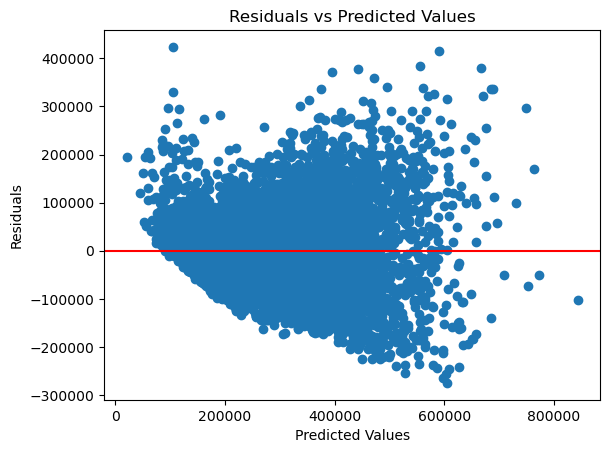

In [39]:
#Linearity assumption where the relationship between the principal components and the target variable Price should be linear

residuals = y_train - y_train_pred  #calculating residuals
plt.scatter(y_train_pred, residuals)
plt.axhline(0, color='red', linestyle='-')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

#### Independence of Residuals Assumption

In [40]:
#Independence of residuals assumption where residuals should not be correlated with each other
from statsmodels.stats.stattools import durbin_watson

#calculating the Durbin-Watson statistic
dw_statistic = durbin_watson(model.resid)
print(f"Durbin-Watson statistic: {dw_statistic}")

Durbin-Watson statistic: 2.0306845109939955


#### No Multicollinearity Assumption

In [41]:
#No Multicollinearity assumption where there should not be strong correlations between predictor variables in the regression model.
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_table = pd.DataFrame()
vif_table["feature"] = X_train_with_const.columns
vif_table["VIF"] = [variance_inflation_factor(X_train_with_const.values, i)
                   for i in range(X_train_with_const.shape[1])]

print(vif_table)

  feature       VIF
0   const  1.000189
1     PC1  1.000213
2     PC2  1.000129
3     PC3  1.000126
4     PC4  1.000115
5     PC7  1.000239
6     PC8  1.000212
7    PC10  1.000185


<p>There are three assumptions that I have verified for the optimized regression model to confirm its accuracy and validity for predicting housing prices. The first assumption is linearity where the relationship between the principal components and the target variable Price should be linear. I created a residual plot to verify the linearity assumption in the model. The residuals were calculated by subtracting the predicted house prices from the actual house prices. In the residual plot, the residuals are distributed randomly around the red center line of zero, which indicates that the model effectively represents the linear relationship between the principal components and Price. There are also no distinct patterns in the residuals, suggesting that the model satisfied the linearity assumption. The second assumption is independence of residuals where residuals should not be correlated with each other. To verify that the residuals in the model are independent, I used the Durbin-Watson test, which checks for autocorrelation in the residuals. A Durbin-Watson statistic value of 2 implies no autocorrelation, whereas values above or below 2 imply negative or positive correlation, respectively. The Durbin-Watson statistic value of the regression model is 2.03, which is very close to 2 indicating that there is no autocorrelation and the residuals in the model are independent. Therefore, the model satisfied the independence of residuals assumption. The third assumption is no multicollinearity, which means that there should not be strong correlations between predictor variables in the regression model. Since the regression model uses principal components that are uncorrelated, this inherently removes multicollinearity. However, I wanted to confirm this so I used the Variance Inflation Factor (VIF), which measures the degree of multicollinearity in the model. A VIF value of 1 implies there is no multicollinearity, whereas values above 5 or 10 imply significant multicollinearity. According to the VIF table, all principal components have a VIF value close to 1, indicating there is no multicollinearity in the model and the components are independent of each other. Therefore, the model satisfied the no multicollinearity assumption.</p>

### G4. Provide the regression equation and discuss the coefficient estimates (REVISION FIXED)

<p><b>Regression Equation:</b><i> Y = Intercept + (Coefficient of X1) * X1 + (Coefficient of X2) * X2 + ... + (Coefficient of Xn) * Xn</i></p>
<p><b>Coefficients from our regression output:</b><i> Price = 306700 + 61890 * PC1 - 24130 * PC2 + 30420 * PC3 + 4530 * PC4 - 3077 * PC7 - 3915 * PC8 + 9282 * PC10</i></p>

<p>The intercept value of 306700 represents the starting predicted price when all principal components are set to zero. PC1 has a coefficient value of 61890, indicating that for each one-unit increase in PC1, the predicted housing price increases by \$61,890. PC2 has a coefficient value of -24130, indicating that for each one-unit increase in PC2, the predicted housing price decreases by \$24,130. PC3 has a coefficient value of 30420, indicating that for each one-unit increase in PC3, the predicted housing price increases by \$30,420. PC4 has a coefficient value of 4530, indicating that for each one-unit increase in PC4, the predicted housing price increases by \$4,530. PC7 has a coefficient value of -3070, indicating that for each one-unit increase in PC7, the predicted housing price decreases by \$3,070. PC8 has a coefficient value of -3915, indicating that for each one-unit increase in PC8, the predicted housing price decreases by \$3,915. PC10 has a coefficient value of 9282, indicating that for each one-unit increase in PC10, the predicted housing price increases by \$9,282.</p>

<p>To summarize, the principal components with positive coefficient values are PC1, PC3, PC4, and PC10. These components increase predicted housing prices when their values increase. The principal components with negative coefficient values are PC2, PC7, and PC8. These components decrease predicted housing prices when their values increase. Since PC1 is the component that captures the most variance, organizations should focus on key variables that have high positive contributions in PC1 such as SquareFootage, SchoolRating, RenovationQuality, and PreviousSalePrice, as seen from the loadings matrix in part E1.</p>

### G5. Discuss the model metrics

<p>The optimized regression model's R-squared value on the training set is 0.638, which means 63.8% of the variance in housing prices is explained by the model. This suggests that the principal components that were retained during the backward stepwise elimination process contribute meaningfully to explaining the variance in housing prices. The adjusted R-squared value on the training set is 0.637, which is only 0.001 lower than the R-squared value. This very small gap between R-squared and adjusted R-squared confirms that the retained principal components in the model are relevant and do not overly complicate the model because the adjusted R-squared value did not get penalized as much. Also, this small difference suggests that the model doesn't suffer significantly from overfitting.</p>

<p>The Mean Squared Error (MSE) on the training set is 8220717571.94, whereas the MSE on the test set is 7782198044.08. The training and test MSE values are highly similar, indicating that the optimized regression model performs equally well on both the training data and unseen test data. The close values also suggest that the model isn't overfitting to the training set, making it reliable for predicting house prices on new data.</p>

### G6. Discuss the results and implications of your prediction analysis

<p>The optimized regression model shows strong generalization to new data and achieves reasonable prediction accuracy for housing prices, as indicated by similar training and test MSE values. It also helps that the seven principal components retained in the model through the backward stepwise elimination process significantly explain the variability in housing prices, as shown in the model's R-squared and adjusted R-squared values. These components have p-values below 0.05, making them statistically significant predictors of housing prices. The components with positive coefficient estimates are PC1, PC3, PC4, and PC10, meaning that they increase predicted housing prices when their values increase. The components with negative coefficient estimates are PC2, PC7, and PC8, meaning that they decrease predicted housing prices when their values increase. Regarding the model's assumptions, it has been verified that the regression model satisfied the assumptions of linearity, independence of residuals, and no multicollinearity. </p>

<p>Overall, the optimized regression model effectively predicts housing prices with reasonable accuracy and generalization, as indicated by its R-squared and adjusted R-squared values, similar MSE values for both training and test sets, and statistically significant coefficients. However, it is  clear that the model can still be improved to achieve better predictive accuracy.</p>

### G7. Recommend a course of action for the real-world organizational situation from part B1 based on your results and implications discussed in part E6

In [42]:
#only including the original 14 independent variables
initial_features = features.columns.tolist()

#creating the loading matrix
loadings_df = pd.DataFrame(
    pca.components_.T, 
    columns=[f'PC{i+1}' for i in range(pca.n_components_)], 
    index=initial_features
)

#displaying loadings for principal components with significant positive contributions to housing prices
print(loadings_df[['PC1', 'PC3', 'PC4', 'PC10']])

                           PC1       PC3       PC4      PC10
SquareFootage         0.324961  0.246368 -0.071753  0.337897
NumBathrooms          0.281964  0.234908 -0.100779 -0.186541
NumBedrooms           0.290224 -0.008796  0.322330 -0.089710
BackyardSpace         0.094886 -0.095680 -0.284129 -0.033898
CrimeRate            -0.112615  0.595225  0.032437 -0.274619
SchoolRating          0.382476 -0.230761  0.206832  0.015227
AgeOfHome            -0.143319  0.154037  0.507138 -0.475966
DistanceToCityCenter -0.200229  0.063212  0.443105  0.690908
EmploymentRate        0.129430 -0.582757  0.250128 -0.228568
PropertyTaxRate      -0.143436  0.144715  0.456297  0.037041
RenovationQuality     0.413570 -0.002008  0.162036  0.028457
LocalAmenities        0.197165  0.105889  0.043066 -0.019435
TransportAccess       0.200527  0.103430  0.045040 -0.027781
PreviousSalePrice     0.463260  0.239081  0.042383  0.081923


<p>I created a loading matrix for principal components (PC1, PC3, PC4 & PC10) that have positive coefficient estimates to focus on components that have a positive influence to housing prices. In PC1, the variables with high positive loadings are RenovationQuality, SchoolRating, SquareFootage, and PreviousSalePrice. In PC3, the variables with high positive loadings are CrimeRate and EmploymentRate. In PC4, the variables with high positive loadings are AgeOfHome, DistanceToCityCenter, and PropertyTaxRate. In PC10, the variables with high positive loadings are SquareFootage, AgeOfHome, and CrimeRate. These variables with high positive loadings should be prioritized when acting on the insights from PCA.</p>

<p>Based on the findings and insights from our regression model, a course of action that organizations like real estate companies or developers can perform is to focus on key features that drive housing prices to maximize their profitability. For example, since RenovationQuality has a significant positive relationship with housing prices, organizations should invest in high-quality renovations like upgrading interior and exterior features to increase property prices. Another example is prioritizing building larger properties because properties with larger square footage are valued more, as indicated by their positive loading. Organizations should also consider building properties in areas with low crime rates and high employment rates because these areas tend to be more desirable to potential buyers and command higher property values.</p>

### H. Panopto Recording

<p><b>Link:</b> https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=9488e1aa-2c9b-4491-9591-b23301655ca4</p>

### I. Sources

<pre>
Choueiry, G. (2019, October 26). <i>Understand Forward and Backward Stepwise Regression</i>. Quantifying Health. https://quantifyinghealth.com/stepwise-selection/ 
</pre>